# Physics 404/604

## Computational Physics 

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |




# 1. Round-off Error (last class)


# 2. Truncation Error

Truncation error is the error made by   
1) truncating an infinite sum and approximating it by a finite sum   
2) discretization error: error due to taking a finite number for steps instead of an infinite number

##  2.1 Differentiation

Study the trajector of a capsule during its reentry to earth (as in movie "hidden figures"). According to  newton's second
law, 
\begin{equation}
F=m \frac{d {\bf v}}{ dt}
\end{equation}

We need to calculate ${\bf v} = dy(t)/dt $. 
Formally, it is $lim_{\Delta t-> 0}\frac{y(t+\Delta t)-y(t)}{h}$. But we cannot do it numerically in this way due to the machine precision. We have to take a finite h, which introduces error.

## 2.2 First derivative

### Forward difference:
\begin{equation}
\frac{d y(t)}{dt}_{fw} = \frac{y(t+h)-y(t)}{h}
\end{equation}
Error estimate: using Taylor expansion
\begin{equation}
y(t+h)=y(t)+h*y'(t)+\frac{h^2}{2!}*y''(t)+\frac{h^3}{3!}*y'''(t)+...
\end{equation}
So
\begin{equation}
\frac{d y(t)}{dt}_{fw} = y'(t)+\frac{h}{2!}*y''(t)+\frac{h^2}{3!}*y'''(t)+...
\end{equation}
Error is $\frac{h}{2!}*y''(t)+\frac{h^2}{3!}*y'''(t)+...$, the leading error is O(h).
Draw a picture to show how forward difference works for the capsule's trajectory.

### Central difference:
\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}
Draw a figure. 
\begin{equation}
y(t+h/2)=y(t)+h/2*y'(t)+\frac{(h/2)^2}{2!}*y''(t)+\frac{(h/2)^3}{3!}*y'''(t)+\frac{(h/2)^4}{4!}*y^{(4)}(t)+\frac{(h/2)^5}{5!}*y^{(5)}(t)+.... 
\end{equation}
\begin{equation}
y(t-h/2)=y(t)-h/2*y'(t)+\frac{(h/2)^2}{2!}*y''(t)-\frac{(h/2)^3}{3!}*y'''(t)+\frac{(h/2)^4}{4!}*y^{(4)}(t)-\frac{(h/2)^5}{5!}*y^{(5)}(t)+....
\end{equation}
So  
\begin{equation}
\frac{d y(t)}{dt}_{cd} = y'(t) + \frac{h^2}{4*3!}*y'''(t)+\frac{(h^4}{2^4*5!}*y^(5)(t)....
\end{equation}
Error is $O(h^2)$. 

### Extrapolated Difference:
We can extend the method to even higher order accuracy using 3 steps:
\begin{equation}
\frac{d y(t)}{dt}_{cd,1} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}
\begin{equation}
\frac{d y(t)}{dt}_{cd,2} = \frac{y(t+h/4)-y(t-h/4)}{h/2}
\end{equation}
\begin{equation}
\frac{d y(t)}{dt}_{ed} = \frac{4*\frac{d y(t)}{dt}_{cd,2}-\frac{d y(t)}{dt}_{cd,1}}{3}
\end{equation}

The error analysis is
\begin{equation}
\frac{d y(t)}{dt}_{cd,1} = y'(t) + \frac{h^2}{2^3/2*3!}*y'''(t) + \frac{(h^4}{2^5/2*5!}*y^{(5)}(t)....
\end{equation}
\begin{equation}
\frac{d y(t)}{dt}_{cd,2} = y'(t) + \frac{h^2}{4^3/4*3!}*y'''(t) + \frac{(h^4}{4^5/4*5!}*y^{(5)}(t)....
\end{equation}
Then we have
\begin{equation}
\frac{d y(t)}{dt}_{ed} = \frac{4*\frac{d y(t)}{dt}_{cd,2}-\frac{d y(t)}{dt}_{cd,1}}{3}=\frac{8[y(t+h/4)-y(t-h/4)]-[y(t+h/2)-y(t-h/2)]}{3 h}
\end{equation}
So the error is $O(h^4)=-\frac{h^4}{64*120}*y^{(5)}(t)....$

In [1]:
import numpy as np

def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx

def deried(y,x,dx):
    return (4*dericd(y,x,dx/2)-dericd(y,x,dx))/3
    

In [2]:
import numpy as np

x=1.0
dx=0.1
print('forward difference',derifw(np.sin,x,dx))
print('central difference',dericd(np.sin,x,dx))
print('extrapolated difference',deried(np.sin,x,dx))
print('analytical result',np.cos(x))

forward difference 0.4973637525353891
central difference 0.5400772080464311
extrapolated difference 0.540302298833476
analytical result 0.5403023058681398


In [3]:
# how's the error change with increasing dx 
# forward difference

import numpy as np
x=1.0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-6, -0.5, 0.1):
    y=derifw(np.sin,x,dx)
    print('dx %g,  y %g'%(dx,y))
    dxarr.append(dx)
    yarr.append(y)

dx 1e-06,  y 0.540302
dx 1.25893e-06,  y 0.540302
dx 1.58489e-06,  y 0.540302
dx 1.99526e-06,  y 0.540301
dx 2.51189e-06,  y 0.540301
dx 3.16228e-06,  y 0.540301
dx 3.98107e-06,  y 0.540301
dx 5.01187e-06,  y 0.5403
dx 6.30957e-06,  y 0.5403
dx 7.94328e-06,  y 0.540299
dx 1e-05,  y 0.540298
dx 1.25893e-05,  y 0.540297
dx 1.58489e-05,  y 0.540296
dx 1.99526e-05,  y 0.540294
dx 2.51189e-05,  y 0.540292
dx 3.16228e-05,  y 0.540289
dx 3.98107e-05,  y 0.540286
dx 5.01187e-05,  y 0.540281
dx 6.30957e-05,  y 0.540276
dx 7.94328e-05,  y 0.540269
dx 0.0001,  y 0.54026
dx 0.000125893,  y 0.540249
dx 0.000158489,  y 0.540236
dx 0.000199526,  y 0.540218
dx 0.000251189,  y 0.540197
dx 0.000316228,  y 0.540169
dx 0.000398107,  y 0.540135
dx 0.000501187,  y 0.540091
dx 0.000630957,  y 0.540037
dx 0.000794328,  y 0.539968
dx 0.001,  y 0.539881
dx 0.00125893,  y 0.539772
dx 0.00158489,  y 0.539635
dx 0.00199526,  y 0.539462
dx 0.00251189,  y 0.539245
dx 0.00316228,  y 0.538971
dx 0.00398107,  y 0.53862

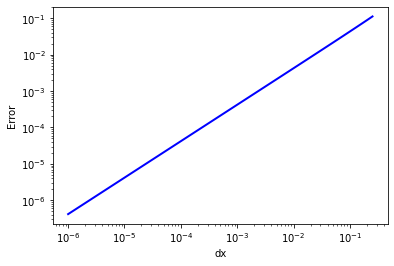

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(dxarr, abs(yarr-np.cos(1.)), 'b-', lw=2)     
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')
plt.show()


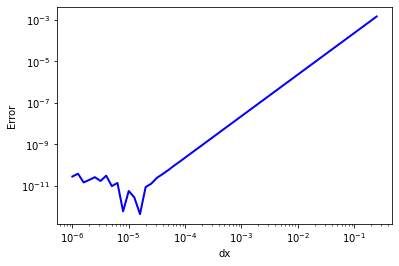

In [5]:
# how's the error change with increasing dx 
# central difference

import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-6., -0.5, 0.1):
    y=dericd(np.sin,x,dx)
    dxarr.append(dx)
    yarr.append(y)
    
plt.plot(dxarr, abs(yarr-np.cos(1.)), 'b-', lw=2)    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

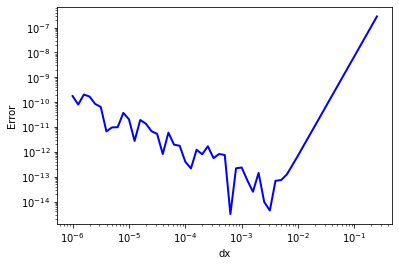

In [6]:
# how's the error change with increasing dx 
# extrapolated difference

import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr=[]
for dx in 10**np.arange(-6., -0.5, 0.1):
    y=deried(np.sin,x,dx)
    dxarr.append(dx)
    yarr.append(y)
    
plt.plot(dxarr, abs(yarr-np.cos(1.)), 'b-', lw=2)    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

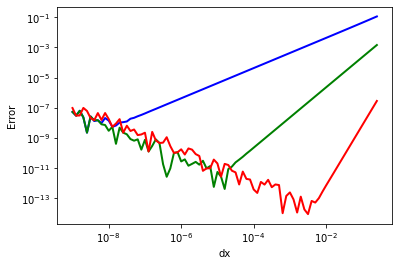

In [7]:
## Plot them together
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yfwarr=[]
ycdarr=[]
yedarr=[]
for dx in 10**np.arange(-9., -0.5, 0.1):
    dxarr.append(dx)
    yfwarr.append(derifw(np.sin,x,dx))
    ycdarr.append(dericd(np.sin,x,dx))
    yedarr.append(deried(np.sin,x,dx))
    
plt.plot(dxarr, np.abs(yfwarr-np.cos(1.)), 'b-', lw=2)  
plt.plot(dxarr, np.abs(ycdarr-np.cos(1.)), 'g-', lw=2)  
plt.plot(dxarr, np.abs(yedarr-np.cos(1.)), 'r-', lw=2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

### Error Assessment

The best results you can get is that the addtion of the round-off error and the truncation error is minimum. Since the truncation error decreases as h becomes small and the round-off error increases as h becomes small (subtraction cancellation), it means that the round-off error roughly equals the truncation error.

The round-off error for the difference $[y(t+h)-y(t)]$ is $(y(t+h)-y(t))*\epsilon_{machine}*y(t)/(y(t+h)-y(t))$, so the error for $([y(t+h)-y(t)])/h$ is $y\times\epsilon_{machine}/h$.  
The truncation error for forward difference is $y''\times h/2$, for central difference is $y'''\times h^2/24$.


Assume that $y\sim y'\sim y''$ and $\epsilon_{machine}\sim 10^{-15}$, h for forward difference is $4\times 10^{-8}$ and h for central difference is $3\times 10^{-5}$.

**More importantly**, the limiting error for the forward difference is  $3\times 10^{-8}$ and for the central difference is $3\times 10^{-11}$. 

**A higher order scheme gets a more accurate result with a bigger interval. Win-Win**

## 2.3 second derivative

Do central difference twice. 
\begin{equation}
y''(x)=\frac{y'(x+h/2)-y'(x-h/2)}{h}=\frac{[y(x+h)-y(x)]-[y(x)-y(x-h)]}{h^2}=\frac{y(x+h)+y(x-h)-2y(x)}{h^2}
\end{equation}

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# forward difference for the first derivative and central difference for the second derivative
def dersecond1(y,x,dx):
        return (y(x+3.*dx/2.)-y(x+dx/2.)-(y(x+dx/2.)-y(x-dx/2.)))/dx/dx
    

# please write your own central difference scheme for second derivative
def dersecond2(y,x,dx):
        return (dericd(y,x+dx/2,dx) - dericd(y,x-dx/2,dx))/dx

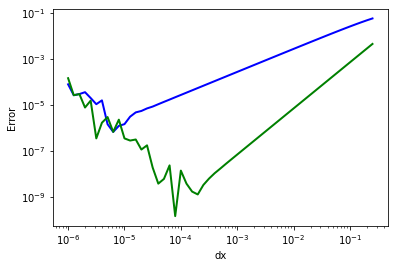

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x=1.0
dxarr=[]
yarr1=[]
yarr2=[]

for dx in 10**np.arange(-6., -0.5, 0.1):
    y=dersecond1(np.sin,x,dx)
    dxarr.append(dx)
    yarr1.append(y)
    y=dersecond2(np.sin,x,dx)
    yarr2.append(y)
    
    
plt.plot(dxarr, np.abs(yarr1+np.sin(1.)), 'b-', lw=2)  
plt.plot(dxarr, np.abs(yarr2+np.sin(1.)), 'g-', lw=2)  
plt.xscale('log')
plt.yscale('log')
plt.xlabel('dx')
plt.ylabel('Error')

plt.show()

# Integration

You want to calculate the total distance the space capsule has traveled:
\begin{equation}
\int_{a}^{b} v(t)dt
\end{equation}
or
\begin{equation}
\int_{a}^{b} f(x)dx
\end{equation}

The mathematic definition is
\begin{equation}
\int_{a}^{b} f(x)dx=lim_{h->0}\left[h\sum_{i=1}^{(b-a)/h}f(x_{i})\right]
\end{equation}
Computationally, we use finite sum over f(x) with width $w_{i}$,

\begin{equation}
\int_{a}^{b} f(x)dx\sim\sum_{i=1}^{N}f(x_{i})w_{i}
\end{equation}
Different algorithms choose different $x_{i}$ and weight $w_{i}$

Note: if there are singularity, remove it by hand first.
\begin{equation}
\int_{0}^{1}\frac{f(x)dx}{\sqrt{1-x^2}}=2\int_{0}^{1}\frac{f(1-y^2)dy}{\sqrt{2-y^2}}
\end{equation}
With $y^2=1-x$.

## 1. Trapezoid Rule

Evenly spaced x, include the endpoints so that there are N-1 intervals. Each interval (h) is (b-a)/(N-1)
\begin{equation}
\int_{x_{i}}^{x_{i}+h}f(x)dx=h\frac{f_{i}+f_{i+1}}{2}
\end{equation}
So
\begin{eqnarray}
\int_{a}^{b}f(x)dx=\frac{h}{2}f_{1}+h f_{2} + h f_{3}+......+h f_{N-1}+\frac{h}{2}f_{N}\\
=\frac{h}{2}f(A)+h f(A+h) + h f(A+2h)+......+f(A+(N-2)*h)+\frac{h}{2}f(B)
\end{eqnarray}

In [24]:
def trapezoid(A,B,y,N):
    h = (B-A)/(N-1)  # interval
    sum = (y(A)+y(B))/2.*h # add first and last terms
    for i in range(1,N-1): # add all other terms
        sum += h*y(A+i*h) # finish this line for the Trapezoid Rule
    return sum

In [25]:
import numpy as np # integrate sin(x) from 0 to pi
print(trapezoid(0,np.pi,np.sin,100))

1.999832163893992


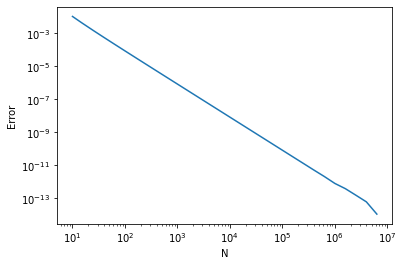

In [27]:
# calculate the error of the integration sin(x) from 0 to pi when N increase from 10 to 10^7 points

import numpy as np
import matplotlib.pyplot as plt

narr=np.array([])
yarr=np.array([])

for i in 10**np.arange(1,7,0.2):
    y = trapezoid(0, np.pi, np.sin, int(i)) # finish this line for integration, how to call a function
    narr=np.append(narr,int(i))
    yarr=np.append(yarr,y)
    
plt.plot(narr,abs(yarr-2.)/2.) # plot relative error
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()


## 2. Simpson's Rule

Approximate the integrand f(x) by a parabolar for each equally spaced interval
\begin{equation}
f(x)=\alpha x^2 +\beta x+\gamma
\end{equation}
We have 
\begin{equation}
\int_{x_{i}}^{x_{i}+h}f(x)dx=\frac{\alpha x^3}{3} + \frac{\beta x^2}{2}+\gamma x \bigg\rvert_{x_{i}}^{x_{i}+h}
\end{equation}
\begin{eqnarray}
\int_{x_{i}-h}^{x_{i}+h}f(x)dx&=&(\frac{\alpha x^3}{3} + \frac{\beta x^2}{2}+\gamma x) \bigg\rvert_{x_{i}-h}^{x_{i}+h}\\
&=&\frac{\alpha (x_{i}+h)^3}{3} + \frac{\beta (x_{i}+h)^2}{2}+\gamma (x_{i}+h) - \frac{\alpha (x_{i}-h)^3}{3} - \frac{\beta (x_{i}-h)^2}{2}-\gamma (x_{i}-h)\\
&=&\frac{\alpha (6x_{i}^2 h+2 h^3)}{3} + \frac{\beta 4 x_{i}h}{2}+\gamma 2h
\end{eqnarray}
We have
\begin{eqnarray}
f(x_{i}+h)&=&\alpha(x_{i}+h)^2+\beta(x_{i}+h)+\gamma\\
f(x_{i})&=&\alpha x_{i}^2+\beta x_{i}+\gamma\\
f(x_{i}-h)&=&\alpha(x_{i}-h)^2+\beta(x_{i}-h)+\gamma
\end{eqnarray}
So that
\begin{equation}
\frac{h}{3}f(x_{i}-h)+\frac{4 h}{3}f(x_{i})+\frac{h}{3}f(x_{i}+h)=\frac{2\alpha h}{3}(x_{i}^2+h^2)+\frac{2\beta h}{3}(x_{i})+\frac{2\gamma h}{3}+\frac{4 h}{3}(\alpha x_{i}^2+\beta x_{i}+\gamma)
\end{equation}

\begin{equation}
\boxed{\int_{x_{i}-h}^{x_{i}+h}f(x)dx=\frac{h}{3}f_{i-1}+\frac{4h}{3}f_{i}+\frac{h}{3}f_{i+1}}
\end{equation}
\begin{equation}
\boxed{\int_{a}^{b}f(x)dx=\frac{h}{3}f_{1}+\frac{4h}{3}f_{2}+\frac{2h}{3}f_{3}+\frac{4h}{3}f_{4}+...+\frac{4h}{3}f_{N-3}+\frac{2h}{3}f_{N-2}+\frac{4h}{3}f_{N-1}+\frac{h}{3}f_{N}}
\end{equation}
**Note: N must be odd for Simpson's rule**

In [33]:
def Simpson(A,B,y,N):
    if(N%2==0):
        print("N needs to be odd for Simpson's rule")
        return 0;

    h = (B-A)/(N-1)
    sum = (y(A)+y(B))/3.*h+y(B-h)*4./3.*h
    for i in range(2,N-1):
        if(i%2==0):
            sum += 4*h/3 * y(A+(i-1)*h)
        if(i%2==1):
            sum += 2*h/3 * y(A+(i-1)*h)

    return sum

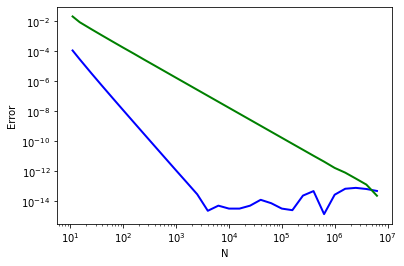

In [34]:
import numpy as np
import matplotlib.pyplot as plt

narr=np.array([])
yarr2=np.array([])

for i in 10**np.arange(1,7,0.2):
    y=Simpson(0,np.pi,np.sin,int(i/2)*2+1)
    narr=np.append(narr,int(i/2)*2+1)
    yarr2=np.append(yarr2,y)
    
plt.plot(narr, np.abs(yarr2-2.), 'b-', lw=2)   
plt.plot(narr, np.abs(yarr-2.), 'g-', lw=2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

## Error Assessment

\begin{equation}
\int_{x_{i}}^{x_{i}+h}f(x)dx=\int_{x_{i}}^{x_{i+1}} (f(x_{i})+f'(x_{i})(x-x_{i})+\frac{f''(x_{i})}{2}(x-x_{i})^2+...)dx=f_{x_{i}}h+f'(x_{i})\frac{h^2}{2}+f''(x_{i})\frac{h^3}{6}+...
\end{equation}
\begin{equation}
\int_{x_{i}}^{x_{i}+h}f(x)dx=\int_{x_{i}}^{x_{i+1}} (f(x_{i+1})+f'(x_{i+1})(x-x_{i+1})+\frac{f''(x_{i+1})}{2}(x-x_{i+1})^2+...)dx=f_{x_{i+1}}h-f'(x_{i+1})\frac{h^2}{2}+f''(x_{i+1})\frac{h^3}{6}+...
\end{equation}

Add these two equations together and divide it by a factor of 2 and consider that $f'(x_{i})$ and $f'(x_{i+1})$ differ by h f'', we get
\begin{equation}
\int_{x_{i}}^{x_{i}+h}f(x)dx=\frac{h}{2}(f_{x_{i}}+f_{x_{i+1}})+O(f''h^3)
\end{equation}
So the total absolute error for the entire region is O($f''h^3 N$) or O($f''(b-a)^3/N^2$) for the Trapezoid rule and O($f''h^5 N$) or O($f''(b-a)^5/N^4$) for the Simpson's rule.

The round-off error after N operations is $\sqrt{N}\epsilon_{m}$ where $\epsilon_{m}$ is the machine precision. Normally, the algorithm has the smallest error when the truncation error equals the round-off error.
\begin{equation}
\sqrt{N}\epsilon_{m}\sim \frac{f''(b-a)^3}{f N^2}\sim \frac{1}{N^2}
\end{equation}

Since $\epsilon_{m}\sim 10^{-15}$, $N\sim 10^6$ and the error is $10^{-12}$

For the Simpson's rule, $\sqrt{N}\epsilon_{m}\sim 1/N^4$. We have $N=2154$ and the error is 5$\times 10^{-14}$.

## 3. Gaussian Quadrature (Optional)

Change the integration [a,b] to [-1,1]
\begin{equation}
\int_{a}^{b}f(\eta)d\eta=\frac{b-a}{2}\int_{-1}^{1}f(\frac{b-a}{2}x+\frac{b+a}{2})dx 
\end{equation}
The book provides some other mapping from [-1,1] to e.g. [0,$\infty$],[-$\infty$,$\infty$],[a,$\infty$],[0,b]

So we only need to calculate integrals with
\begin{equation}
\int_{-1}^{1}f(x)d x=\sum_{i=1}^{n}w_{i}f(x_{i})
\end{equation}
We want to choose $w_{i}$ and $x_{i}$ so that the equaltion is exact if $f(x)$ is the polynomial with
order of 2n-1 or less.

The Gauss-Legendre method uses the Legendre polynomials.
The Legendre polynomials $P_{n}(x)$ form an orthogonal basis set for real-valued functions defined on [-1,1].
Any k degree polynomial can be expanded with $P_{n}(x)$ up to the degree of k:
\begin{equation}
f_{k}(x)=\sum_{m=0}^{k}c_{m}P_{m}(x)
\end{equation}
From Wiki
![From Wiki](https://wikimedia.org/api/rest_v1/media/math/render/svg/23c28016951473c3ac55ed5512895376dc00b1c3)
![From Wiki](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Legendrepolynomials6.svg/640px-Legendrepolynomials6.svg.png)
If we plug in $f(x)=x^kP_{n}(x)$ into the above Equation, we have
\begin{equation}
\int_{-1}^{1}x^k P_{n}(x)d x=\sum_{i=1}^{n}w_{i}x_{i}^kP_{n}(x_{i})
\end{equation}
If $k<n$, it is zero. This will be satisfied if $x_{i}$ is the root of $P_{n}$.
\begin{equation}
P_{n}(x_{i})=0, i=1,2,...,n-1
\end{equation}

Now $x_{i}$ is determined, we will skip the derivation for $w_{i}$ and give the results directly
\begin{equation}
w_{i}=\frac{2}{(1-x_{i}^2)[P_{n}'(x_{i})]^2}, i=1,2,...,n
\end{equation}

### How to derive $x_{i}$ and Pn'($x_{i}$)?

Orthogonal polynomials are derived from the so-called generating function. Writing out them
explicitly is too complicated. Normally we calculate them using the recurrence relation
\begin{equation}
a_{n}f_{n}(x)=(b_n+c_n x)f_{n-1}(x)-d_n f_{n-2}(x)
\end{equation}
For the derivative, 
\begin{equation}
g_{2}(x)f_n'(x)=g_{1}(x)f_n(x)+g_0(x)f_{n-1}(x)
\end{equation}
(the derviatives also compose an orthogonal system themselves)
For $P_{n}(x)$, $a_n=n$, $b_{n}=0$, $c_{n}=2n-1$, $d_n=n-1$, $f_0(x)=1$, $f_1(x)=x$, $g_0(x)=n$, $g_1(x)=-nx$, $g_2(x)=1-x^2$ 

In [15]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# IntegGauss.py: Gaussian quadrature generator of pts & wts
 
from numpy import *
from sys import version    

w = zeros((2001), float)
x = zeros((2001), float)

def gauss(npts, job, a, b, x, w):
    m  = i = j = t = t1 = pp = p1 = p2 = p3 = 0.  
    eps = 3.E-15                  # Accuracy: ******ADJUST THIS*******!
    m = int((npts + 1)/2 )
    for i in range(1, m + 1):
        t = cos(math.pi*(float(i) - 0.25)/(float(npts) + 0.5) ) # initial guess of x_i
        t1 = 1 
        while( (abs(t - t1) ) >= eps):  # iteration until it converges 
            p1 = 1. ;  p2 = 0.  
            for j in range(1, npts + 1):
                p3 = p2;   p2 = p1 
                p1 = ((2.*float(j)-1)*t*p2 - (float(j)-1.)*p3)/(float(j)) # Pn using recurrence relation
            pp = npts*(t*p1 - p2)/(t*t - 1.)  # derivative using recurrence relation 
            t1 = t; t = t1  -  p1/pp       # interation to get x_i using Newton-Raphson method
        x[i - 1] = - t;   x[npts - i] = t 
        w[i - 1] = 2./( (1. - t*t)*pp*pp) 
        w[npts - i] = w[i - 1]  
    if (job == 0):
        for i in range(0, npts):
            x[i] = x[i]*(b - a)/2. + (b + a)/2. 
            w[i] = w[i]*(b - a)/2. 
    if (job == 1):
        for i in range(0, npts):
            xi   = x[i]
            x[i] = a*b*(1. + xi) / (b + a - (b - a)*xi) 
            w[i] = w[i]*2.*a*b*b/( (b + a - (b-a)*xi)*(b + a - (b-a)*xi))
    if (job == 2):
        for i in range(0, npts):
            xi = x[i]
            x[i] = (b*xi +  b + a + a) / (1. - xi) 
            w[i] = w[i]*2.*(a + b)/( (1. - xi)*(1. - xi) )
            
def gaussint (no, min, max, f):
    quadra = 0.  
    gauss (no, 0, min, max, x, w)                     # Returns pts & wts
    for n in  range(0, no):
        quadra   += f(x[n]) * w[n]                   # Calculate integral
    return (quadra)                   

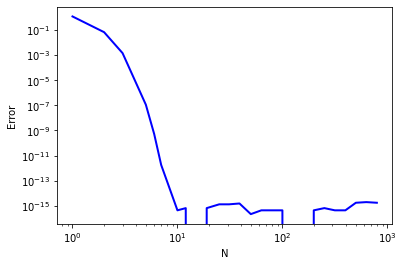

In [16]:
import numpy as np
import matplotlib.pyplot as plt

narr2=np.array([])
yarr3=np.array([])

for i in 10**np.arange(0,3,0.1):
    y=gaussint(int(i),0,np.pi,np.sin)
    narr2=np.append(narr2,int(i))
    yarr3=np.append(yarr3,y)
plt.plot(narr2, np.abs(yarr3-2.), 'b-', lw=2)   
# plt.plot(narr, np.abs(yarr2-2.), 'r-', lw=2)   
# plt.plot(narr, np.abs(yarr-2.), 'g-', lw=2) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()



### Error Assessment

If f($\eta$) is beyond 2n-1 polynomial, we have
\begin{equation}
\int_{a}^{b}f(\eta)d\eta=\frac{b-a}{2}\sum_{i=1}^{n}w_{i}f(\eta_{i})+\frac{(b-a)^{2n+1}(n!)^4}{(2n+1)[(2n)!]^3}f^{2n}(\eta)
\end{equation}
where
\begin{equation}
\eta_{i}=\frac{b-a}{2}x_{i}+\frac{b+a}{2}
\end{equation}


In [17]:
# Error for sin(x)
import numpy as np
n=8
error=pow(3.14,(2*n+1))*pow(np.math.factorial(n),4)/(2*n+1)/pow(np.math.factorial(2*n),3)
print(error)

4.759687154487254e-15


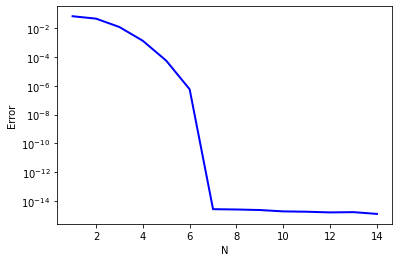

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def x12(x): return pow(x,13)


narr2=np.array([])
yarr3=np.array([])

for i in range(1,15):
    y=gaussint(i,0,1,x12)
    narr2=np.append(narr2,int(i))
    yarr3=np.append(yarr3,y)
plt.plot(narr2, np.abs(yarr3-1./14), 'b-', lw=2)   
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()



# write a function e.g. f(x)=x^13, show that the integration is exact when n=7 (2n-1=13)


# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)